In [ ]:
from datetime import datetime
import os

import requests
from PIL import Image
import io
import numpy as np
from skimage.color import rgb2gray
import urllib.parse
import polyline
from IPython.display import display, Markdown
import pyproj
import random

In [ ]:
GOOGLE_API_KEY=os.environ['GOOGLE_API_KEY']

def maps_static_api(lat=None, lon=None, width=512, height=512, zoom=None, querystring=None, **kwargs):
    url = 'https://maps.googleapis.com/maps/api/staticmap?size={width}x{height}{center_par}{zoom_par}{additional_params}'.format(
        width=width, height=height,
        center_par="&center={lat},{lon}".format(lat=lat, lon=lon) if (lat and lon) else "",
        zoom_par="&zoom={}".format(zoom) if zoom else "",
        additional_params="&{}".format(querystring) if querystring else "",
        api_key=GOOGLE_API_KEY)+"&"+urllib.parse.urlencode(kwargs) + "&key="+GOOGLE_API_KEY
    response = requests.get(url)
    if (response.status_code // 100 != 2):
        raise Exception(response.content)
    img_tmp = Image.open(io.BytesIO(response.content))
    return img_tmp.convert('RGB')

In [ ]:
los_angeles = [
    {'n': 34.269260, 'w': -118.604202, 's': 34.171040, 'e': -118.370722},
    {'n': 34.100406, 'w': -118.362530, 's': 33.797995, 'e': -117.863483},
    {'n': 33.714559, 'w': -117.993473, 's': 33.629157, 'e': -117.746060}
]

chicago = [
    {'n': 42.072123, 'w': -88.311501, 's': 41.643560, 'e': -87.682533}
]

houston = [
    {'n': 29.875249, 'w': -95.563377, 's': 29.610542, 'e': -95.189842}
]

phoenix = [
    {'n': 33.688554, 'w': -112.381892, 's': 33.392095, 'e': -111.887507}
]

philadelphia = [
    {'n': 40.052889, 'w': -75.233393, 's': 39.904511, 'e': -75.150009},
    {'n': 40.049736, 'w': -75.144129, 's': 40.026079, 'e': -75.027399}
]

san_francisco = [
    {'n': 37.790910, 'w': -122.501267, 's': 37.735590, 'e': -122.393120},
    {'n': 37.826862, 'w': -122.295123, 's': 37.800282, 'e': -122.255984}
]

boston = [
    {'n': 42.387338, 'w': -71.141267, 's': 42.363792, 'e': -71.076510},
    {'n': 42.352338, 'w': -71.141267, 's': 42.283792, 'e': -71.056510}
]

cities_boxes = [los_angeles, chicago, houston, phoenix, philadelphia, san_francisco, boston]
cities = {
    'Los Angeles': los_angeles,
    'Chicago': chicago,
    'Houston': houston,
    'Phoenix': phoenix,
    'Philadelphia': philadelphia,
    'San Francisco': san_francisco,
    'Boston': boston
}

## Los Angeles

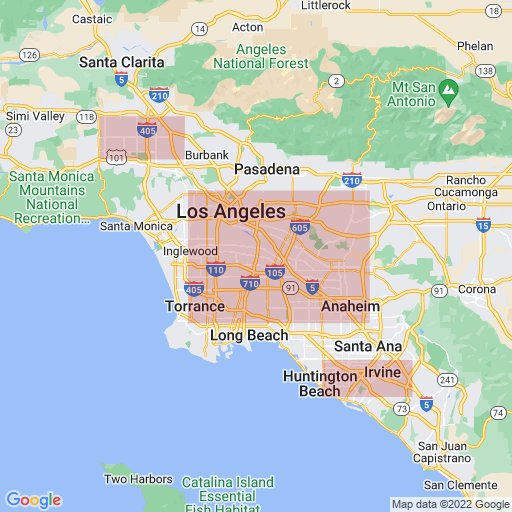

## Chicago

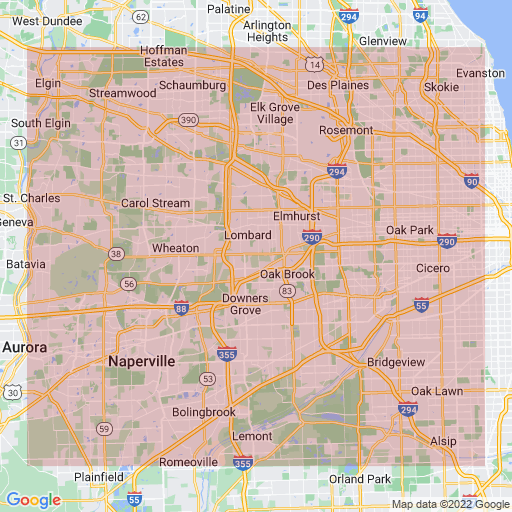

## Houston

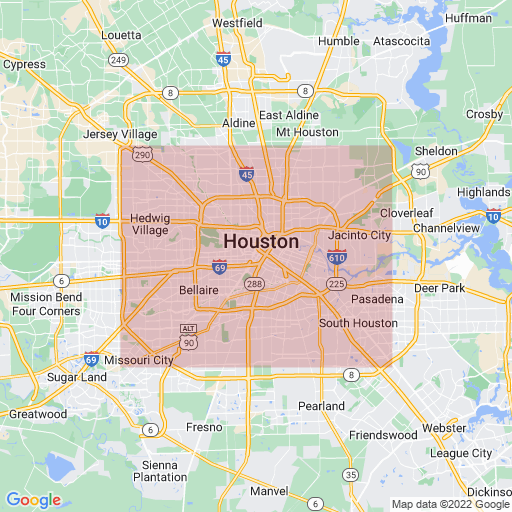

## Phoenix

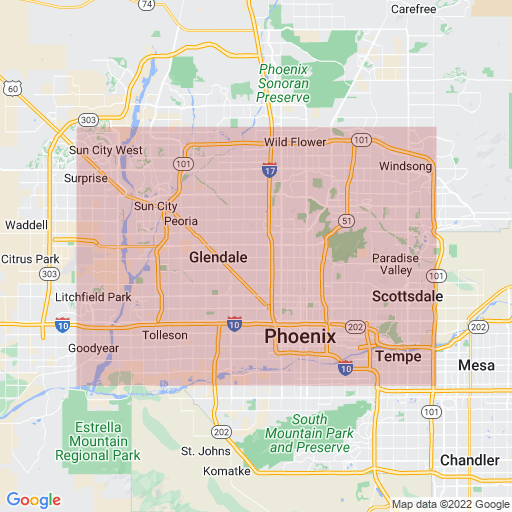

## Philadelphia

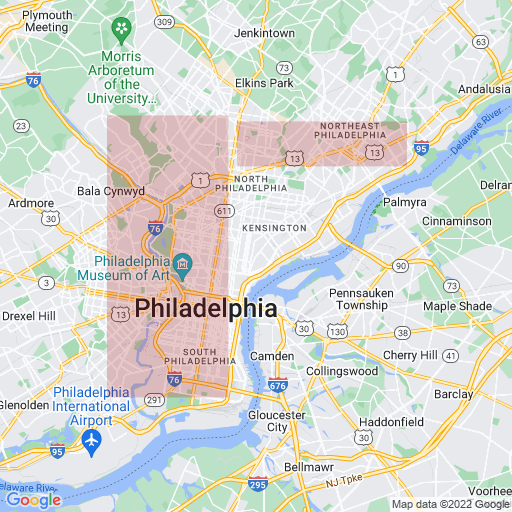

## San Francisco

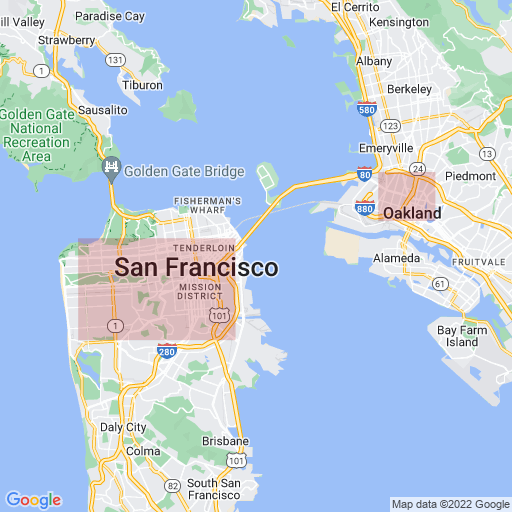

## Boston

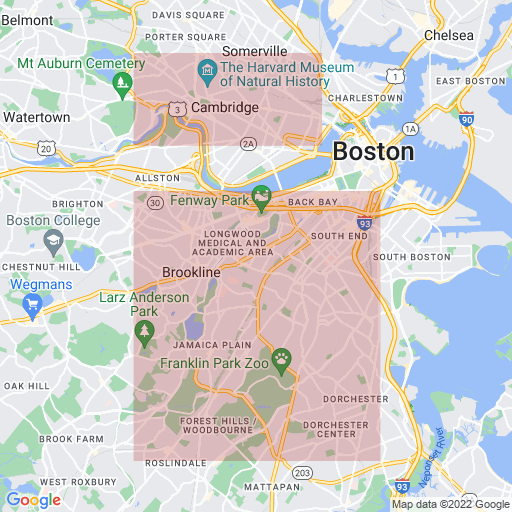

In [ ]:
def area_polyline(area):
    path = [
        (area['n'], area['w']),
        (area['n'], area['e']),
        (area['s'], area['e']),
        (area['s'], area['w']),
    ]
    return polyline.encode(path, 5)

def area_path_parameter(area):
    return "fillcolor:0xAA000033|color:0xFFFFFF00|enc:{enc}".format(enc=area_polyline(area))

def city_overview_map(areas):
    querystring = "&".join(map(lambda arg: "path={}".format(arg), map(area_path_parameter, areas)))
    img_overview = maps_static_api(
        querystring=querystring
    )
    return img_overview

for name, city in cities.items():
    display(Markdown('## '+name))
    display(city_overview_map(city))

In [ ]:
# def pick_random_center_from_city(city_boxes):
#     index = np.random.randint(len(city_boxes))
#     box = city_boxes[index]

#     rand_x = np.random.uniform(box['w'], box['e'])
#     rand_y = np.random.uniform(box['n'], box['s'])

#     return rand_x, rand_y

# def pick_random_center(cities_boxes):
#     city_nr = np.random.randint(len(cities_boxes)) #pick a city
#     return pick_random_center_from_city(cities_boxes[city_nr])

def pick_random_centers(boxes):
    centers = []
    for box in boxes:
        rand_x = np.random.uniform(box['w'], box['e'])
        rand_y = np.random.uniform(box['n'], box['s'])
        centers.append((rand_x, rand_y))
    return centers

import pyproj
geod = pyproj.Geod('+a=6378137 +f=0.0033528106647475126')
def area_weight(area):
    coordinates = np.array([
        (area['n'], area['w']),
        (area['n'], area['e']),
        (area['s'], area['e']),
        (area['s'], area['w']),
    ])
    lats = coordinates[:,0]
    lons = coordinates[:,1]
    area_m, _ = geod.polygon_area_perimeter(lons, lats)
    return abs(area_m) # Positive is counterclockwise, the data is clockwise.

def pick_random_areas(city, n=1):
    choices = [area for area in city]
    weights = [area_weight(area) for area in city]
    p = np.asarray(weights).astype('float64')
    p = p / np.sum(p)
    
    #samples = random.choices(choices, weights, k=n)
    samples = np.random.choice(len(choices), size=n, replace=True, p=p)
    samples = [choices[x] for x in samples]
    return samples

In [ ]:
def download_map_sample(lat, lon, zoom=18, target_width=400, target_height=400):
    bottom_crop = 20
    args = {
        "lat": lat,
        "lon": lon,
        "zoom": zoom,
        "width": target_width+bottom_crop,
        "height": target_height+bottom_crop
    }
    img_sat = maps_static_api(
        maptype="satellite",
        **args
    )
    img_sat = img_sat.crop(box=(0,0,target_width, target_height)) # remove pixels at the bottom
    img_mask = maps_static_api(
        maptype="roadmap",
        map_id="7ed943b30af08eea",
        **args
    )
    img_mask = img_mask.crop(box=(0,0,target_width, target_height)) # remove pixels at the bottom
    return img_sat, img_mask

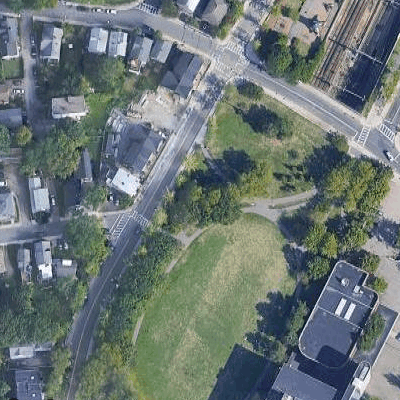

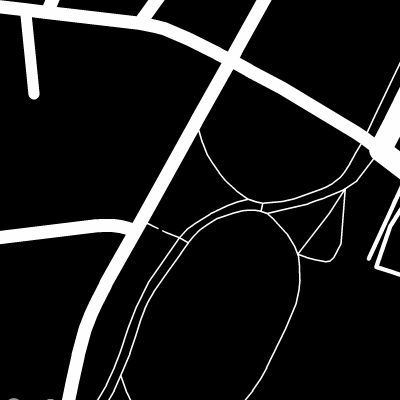

In [ ]:
city_nr = np.random.randint(len(cities_boxes)) #pick a city
x, y = pick_random_centers(pick_random_areas(cities_boxes[city_nr], n=1))[0]
sat, mask = download_map_sample(y, x)
display(sat)
display(mask)

In [ ]:
from skimage.io import imsave
from pathlib import Path

dataset_directory = os.getenv('DATASET_DIR', "../gmaps_dataset/")

def save_image(name, image, mask, img_path, mask_path):
    imsave(img_path, np.array(image.convert('RGB')).astype(np.uint8))
    # the following removes anti-aliasing
    mask_arrray = (np.array(mask.convert('RGB')).astype(bool)*255)
    imsave(mask_path, mask_arrray.astype(np.uint8))

def download_dataset(dataset_sources, seed, force_download=False):
    np.random.seed(seed)
    Path(os.path.join(dataset_directory, "images")).mkdir(parents=True, exist_ok=True)
    Path(os.path.join(dataset_directory, "masks")).mkdir(parents=True, exist_ok=True)
    for name, city_boxes, count in dataset_sources:
        samples = pick_random_centers(pick_random_areas(city_boxes, n=count))
        for i in range(count):
            x, y = samples[i]
            print(x, y)
            img_path = os.path.join(dataset_directory, "images", "{}_{}.png".format(name, i+1))
            mask_path = os.path.join(dataset_directory, "masks", "{}_{}.png".format(name, i+1))
            
            if (os.path.isfile(img_path) and os.path.isfile(mask_path)) and (not force_download):
                print("Already exists: {}_{}.png".format(name, i+1))
            else:
                sat, mask = download_map_sample(y, x)
                save_image(name, sat, mask, img_path, mask_path)
                print("Saved {}_{}.png".format(name, i+1))
    print("DONE")

In [ ]:
sum_areas = 0
for city, boxes in cities.items():
    area = sum(area_weight(area) for area in boxes) / 1000000
    sum_areas += area
    print("{:17.17s}: {:5.0f} km2".format(city, area))
print("TOTAL ---------- : {:5.0f} km2".format(sum_areas))
total_images = 12000
for city, boxes in cities.items():
    area = sum(area_weight(area) for area in boxes) / 1000000
    print("{:17.17s}: {:5.0f} images".format(city, total_images * area / sum_areas))

Los Angeles      :  1999 km2
Chicago          :  2486 km2
Houston          :  1060 km2
Phoenix          :  1510 km2
Philadelphia     :   144 km2
San Francisco    :    69 km2
Boston           :    67 km2
TOTAL ---------- :  7335 km2
Los Angeles      :  3271 images
Chicago          :  4067 images
Houston          :  1735 images
Phoenix          :  2470 images
Philadelphia     :   235 images
San Francisco    :   112 images
Boston           :   110 images


In [ ]:
dataset_sources = [
    ("los_angeles", los_angeles, 3271),
    ("chicago", chicago, 4067),
    ("houston", houston, 1735),
    ("phoenix", phoenix, 2470),
    ("philadelphia", philadelphia, 235),
    ("san_francisco", san_francisco, 112),
    ("boston", boston, 110),
]
download_dataset(dataset_sources, seed=42)

-112.01678992376954 33.54751372154638
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: ../gmaps_dataset/masks/phoenix_2438.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
Saved phoenix_2438.png
-112.21585210439413 33.604721111455184
Saved phoenix_2439.png
-112.04602885114878 33.40415965857109
Saved phoenix_2440.png
-112.094627262779 33.41802730560357
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: ../gmaps_dataset/masks/phoenix_2441.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
Saved phoenix_2441.png
-112.37485721243154 33.45302602653929
Saved phoenix_2442.png
-111.9598836499444 33.50149019779705
Saved phoenix_2443.png
-111.92010625283055 33.513668984043406
Saved phoenix_2444.png
-112.26297416344431 33.62460268587502
Saved phoenix_2445.png
-112.10709488729111 33.41981868044902
Saved phoenix_2446.png
-112.34611437313787 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ddedec99-c003-49f8-9064-90484ffbe195' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>